In [45]:
import pandas as pd

## Q1 - read CSB and store in a DF

In [46]:
filename = "exam_2.csv"
df = pd.read_csv(filename)

print(df.head())
print(df.tail())

   Exam_grade  quiz_grade  gender
0          90          12    male
1         102          21  female
2          56          21  female
3         102          21    male
4          97           3  female
    Exam_grade  quiz_grade  gender
21          84          25    male
22          58          45  female
23         102          45    male
24          44          47  female
25          90          30  female


## Q2 - how many Row and Columns

In [47]:
df.shape # to get the rows x columns

(26, 3)

## Q3 - Sorting a DataFrame

In [84]:
# df.sort_values(by="Exam_grade") # ascending order is the default
df.sort_values(by="Exam_grade", ascending=False) # descending order 


,Exam_grade,quiz_grade,gender
23,102,45,male
3,102,21,male
1,102,21,female
4,97,3,female
9,95,12,male
5,95,10,female
6,92,12,male
0,90,12,male
25,90,30,female
18,89,15,female


## Q4 - Creating a subset 

In [49]:
# making a sub dataframe
sub_df = df[["quiz_grade"]]
print(sub_df.head())

   quiz_grade
0          12
1          21
2          21
3          21
4           3


## Creating a Scatter Plot

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns 

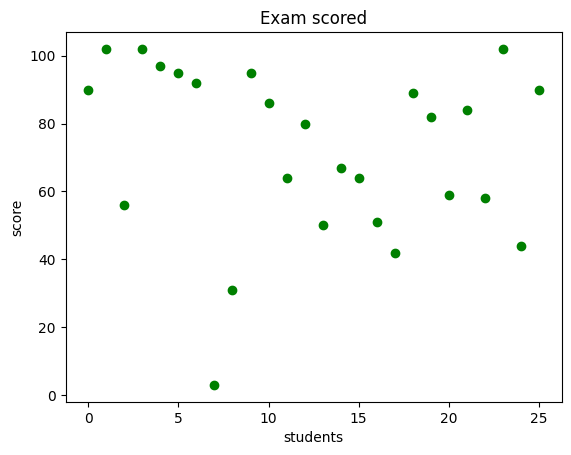

In [51]:
plt.scatter(df.index, df['Exam_grade'], color='green')
plt.title("Exam scored")
plt.xlabel("students")
plt.ylabel("score")
plt.show()

## Q6 - Creating a Violin plot

In [52]:
import seaborn as sns

<Axes: xlabel='gender', ylabel='quiz_grade'>

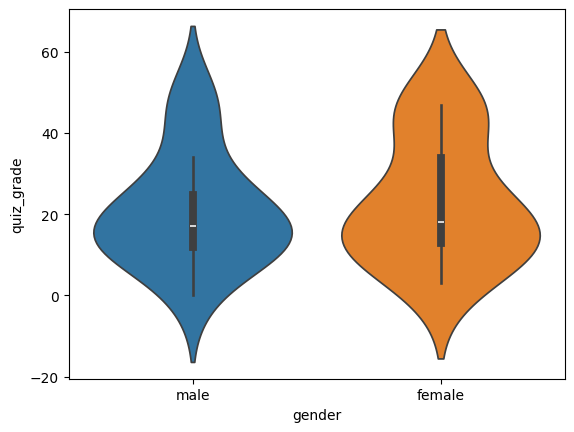

In [55]:
sns.violinplot(x="gender", y="quiz_grade", hue="gender",data=df)

## Q7 - Running Linear Regression

In [57]:
import statsmodels.formula.api as smf

# Fit the linear regression model: Exam_grade ~ quiz_grade
model = smf.ols('Exam_grade ~ quiz_grade', data=df).fit()
# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_grade   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.935
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.177
Time:                        23:02:18   Log-Likelihood:                -119.41
No. Observations:                  26   AIC:                             242.8
Df Residuals:                      24   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.7403      9.063      9.130      0.0

## Q8 Plotting Linear Regression

/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_67370/2062143016.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


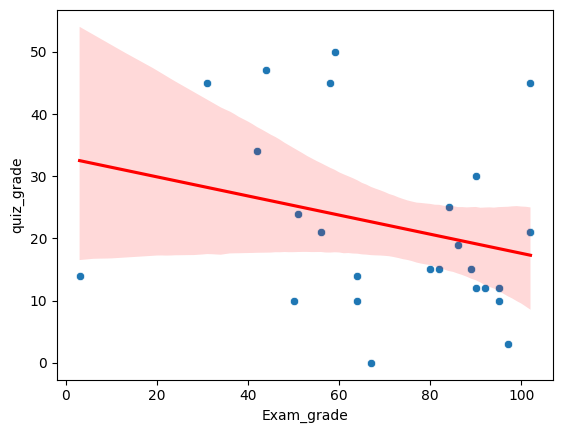

In [85]:
sns.scatterplot(
    x="Exam_grade",
    y="quiz_grade",
    data=df, 
    palette="coolwarm", 

)
#regression plot
sns.regplot(
    x="Exam_grade",
    y="quiz_grade",
    data=df,
    scatter_kws={'alpha':0}, # this adjust the transparency of scatter points
    line_kws={'color':'red'} #customize the line color
)
plt.show()

## Q9 - Grouping Data


In [61]:
group_by_gender = df.groupby("gender")["Exam_grade"].mean()
print(group_by_gender)

gender
female    67.416667
male      76.142857
Name: Exam_grade, dtype: float64


## Q-10 Combining and Cleaning DataFrames

In [68]:
data1 = pd.DataFrame({
    'Apple': [12, 45, 30, 20, 25],
    'Cherry': [15, 50, 35, 25, 30],
    'Orange': [15, 50, 32, 25, 30],
})

data2 = pd.DataFrame({
    'Orange': [12, 45, 30, 20, 25,3],
    'Cherry': [15, 50, 35, 25, 30,2],
    'Pear': [12, 45, 30, 20, 25,2],
})

In [69]:
#Concat deafults
appended_df = pd.concat([data1,data2])
print(appended_df)

   Apple  Cherry  Orange  Pear
0   12.0      15      15   NaN
1   45.0      50      50   NaN
2   30.0      35      32   NaN
3   20.0      25      25   NaN
4   25.0      30      30   NaN
0    NaN      15      12  12.0
1    NaN      50      45  45.0
2    NaN      35      30  30.0
3    NaN      25      20  20.0
4    NaN      30      25  25.0
5    NaN       2       3   2.0


In [70]:
#Concat deafults is basically axis=0
# this will merge the first df1 to df2 like this
# content 
# df1 and on the bottom will be df2

appended_df = pd.concat([data1,data2], axis=0)
print(appended_df)

   Apple  Cherry  Orange  Pear
0   12.0      15      15   NaN
1   45.0      50      50   NaN
2   30.0      35      32   NaN
3   20.0      25      25   NaN
4   25.0      30      30   NaN
0    NaN      15      12  12.0
1    NaN      50      45  45.0
2    NaN      35      30  30.0
3    NaN      25      20  20.0
4    NaN      30      25  25.0
5    NaN       2       3   2.0


In [71]:
# here the data will concat from left to right in this case
# df1 then df2 
appended_df = pd.concat([data1,data2], axis=1)
print(appended_df)

   Apple  Cherry  Orange  Orange  Cherry  Pear
0   12.0    15.0    15.0      12      15    12
1   45.0    50.0    50.0      45      50    45
2   30.0    35.0    32.0      30      35    30
3   20.0    25.0    25.0      20      25    20
4   25.0    30.0    30.0      25      30    25
5    NaN     NaN     NaN       3       2     2


### Merging: works like joins in Database

In [77]:
df1 = pd.DataFrame({
    'id': [1,2,3],
    'name': ['aline','bob','john'],
    'age': [25,43,12]
})
df2 = pd.DataFrame({
    'id': [1,2,4],
    'city': ['New york','philly','chicago'],
    'salary': [25000,430000,12000]
})

In [78]:
merged_inner = pd.merge(df1,df2,on='id')
print(merged_inner)

   id   name  age      city  salary
0   1  aline   25  New york   25000
1   2    bob   43    philly  430000


In [79]:
merged_left = pd.merge(df1,df2,how='left')
print(merged_left)

   id   name  age      city    salary
0   1  aline   25  New york   25000.0
1   2    bob   43    philly  430000.0
2   3   john   12       NaN       NaN


In [81]:
merged_right= pd.merge(df1,df2,how='right')
print(merged_right)

   id   name   age      city  salary
0   1  aline  25.0  New york   25000
1   2    bob  43.0    philly  430000
2   4    NaN   NaN   chicago   12000


In [82]:
merged_outer = pd.merge(df1,df2, how='outer')
print(merged_outer)

   id   name   age      city    salary
0   1  aline  25.0  New york   25000.0
1   2    bob  43.0    philly  430000.0
2   3   john  12.0       NaN       NaN
3   4    NaN   NaN   chicago   12000.0
